# Tests on the deepbays package

## Define the model

In [1]:
import deepbays as db
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# define network model
hidden_units = 18 # Number of units in the hidden layers
num_hidden_layers = 2 # Number of hidden layers (L)
activation_function = "erf" # Activation function ('erf', 'relu')
N0 = 32 * 32 # input dimension

In [3]:
# Instantiate the FCNet.
model_init = db.NN.FCNet(N0=N0, N1=hidden_units, L=num_hidden_layers, act=activation_function)
net_init = model_init.Sequential()


The network has 2 dense hidden layer(s) of size 18 with erf actviation function Sequential(
  (0): Norm()
  (1): Linear(in_features=1024, out_features=18, bias=False)
  (2): Erf()
  (3): Norm()
  (4): Linear(in_features=18, out_features=18, bias=False)
  (5): Erf()
  (6): Norm()
  (7): Linear(in_features=18, out_features=1, bias=False)
)


In [4]:
# try the network function on a random input tensor
P = 25
X = torch.rand(P,N0)
y = net_init(X)

print(f"X.shape={X.shape} \t y.shape={y.shape}")

X.shape=torch.Size([25, 1024]) 	 y.shape=torch.Size([25, 1])


## Visualize and save the model parameters

In [5]:
# visualize the model state dictionary
state_dict_to_save = net_init.state_dict()

# Print a summary of the state_dict
print("Model State Dict Summary:")
print(f"{'Parameter Name':<30} {'Shape':<20} {'Size':<10}")
print("=" * 60)

total_params = 0
for name, param in state_dict_to_save.items():
    param_shape = tuple(param.shape)
    param_size = param.numel()  # Total number of elements in the tensor
    total_params += param_size
    print(f"{name:<30} {str(param_shape):<20} {param_size:<10}")

print("=" * 60)
print(f"Total Parameters: {total_params}")

Model State Dict Summary:
Parameter Name                 Shape                Size      
1.weight                       (18, 1024)           18432     
4.weight                       (18, 18)             324       
7.weight                       (1, 18)              18        
Total Parameters: 18774


In [6]:
state_dict_to_save

OrderedDict([('1.weight',
              tensor([[ 1.4593, -0.6536, -2.7548,  ...,  0.3791, -2.3085, -0.0810],
                      [ 0.6411, -1.6656, -1.7772,  ..., -0.7929, -1.1913, -0.3650],
                      [ 0.3494, -0.8232, -1.6027,  ...,  0.4062, -0.4263,  0.7562],
                      ...,
                      [-0.1761,  0.9440,  0.3839,  ...,  1.7664, -1.1254,  0.4711],
                      [-0.1197,  0.0486,  0.4198,  ...,  0.0933, -0.5422,  1.3738],
                      [ 0.5264,  0.4369, -2.2974,  ...,  0.4445,  0.0318,  0.1836]])),
             ('4.weight',
              tensor([[-1.0878e+00, -6.2809e-01,  8.6341e-01, -4.1432e-01, -9.1002e-01,
                        1.6696e-01, -7.6297e-01,  4.5014e-01,  7.7668e-01, -5.7912e-02,
                        1.2599e+00, -3.2923e-01, -1.0685e-01,  1.2278e-01,  5.6976e-01,
                        7.1492e-01, -8.4445e-01,  1.0369e+00],
                      [ 9.4159e-01, -4.6536e-01,  8.9769e-02, -2.7415e-01,  2.4146e-01,

In [7]:
# save the model parameters
PATH = "./model/state_dict_to_save.pth"

# Ensure the directory exists
os.makedirs(os.path.dirname(PATH), exist_ok=True)

torch.save(state_dict_to_save, PATH)

## Load and visualize the CIFAR10 dataset

In [8]:
# import CIFAR10 dataset
N0 = 32 * 32 # input dimension
classes = 0,1 # classes of the CIFAR10 task used (planes and cars)
seed = 1234 # the default value
P = 5000 # number of train examples
Pt = 1000 # number of test examples
dataclass = db.tasks.cifar_dataset(N0, classes, seed)
X, Y, Xtest, Ytest = dataclass.make_data(P, Pt)

print("\n")
print(f"X.shape={X.shape}, Y.shape={Y.shape}")
print(f"Xtest.shape={Xtest.shape}, Ytest.shape={Ytest.shape}")

Files already downloaded and verified
Files already downloaded and verified


X.shape=torch.Size([5000, 1, 32, 32]), Y.shape=torch.Size([5000, 1])
Xtest.shape=torch.Size([1000, 1, 32, 32]), Ytest.shape=torch.Size([1000, 1])


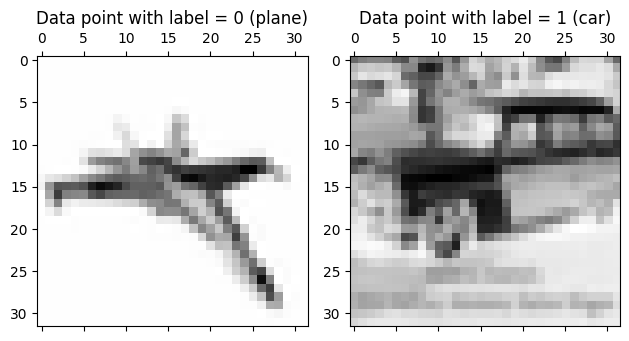

In [9]:
# look at some examples of data label
np.random.seed(3*seed)
n = np.random.randint(0,5000,2)

fig, ax = plt.subplots(1,2)

label = "plane" if Y[n[0]].item()==0 else "car" 
ax[0].matshow(X[n[0],:].reshape(32,32),cmap='binary')
ax[0].set_title(f"Data point with label = {Y[n[0]].item()} ({label})")

label = "plane" if Y[n[1]].item()==0 else "car"
ax[1].matshow(X[n[1],:].reshape(32,32),cmap='binary')
ax[1].set_title(f"Data point with label = {Y[n[1]].item()} ({label})")

fig.tight_layout()

## Load the parameters

In [10]:
# re-define the model
model = db.NN.FCNet(N0=N0, N1=hidden_units, L=num_hidden_layers, act=activation_function)
net = model.Sequential()


The network has 2 dense hidden layer(s) of size 18 with erf actviation function Sequential(
  (0): Norm()
  (1): Linear(in_features=1024, out_features=18, bias=False)
  (2): Erf()
  (3): Norm()
  (4): Linear(in_features=18, out_features=18, bias=False)
  (5): Erf()
  (6): Norm()
  (7): Linear(in_features=18, out_features=1, bias=False)
)


In [11]:
# visualize the parameters: they are different that before. This is a new initialization
net.state_dict()

OrderedDict([('1.weight',
              tensor([[ 1.1914,  0.6863, -1.2932,  ..., -0.6435, -0.6339,  1.2948],
                      [-0.6485,  1.6520, -0.4557,  ...,  0.4842, -0.9413,  1.1117],
                      [ 0.2491, -0.6899, -0.0760,  ..., -0.4363,  0.4971, -1.0190],
                      ...,
                      [-1.4811, -0.1891, -1.4215,  ..., -0.8420, -0.3277,  0.8770],
                      [ 0.6509,  1.4357,  0.6832,  ..., -0.1045,  0.7272, -1.0309],
                      [-0.0948,  0.4947, -1.4260,  ...,  0.6001, -0.0846,  0.6387]])),
             ('4.weight',
              tensor([[-2.8461e-01,  3.9463e-01, -6.1420e-01,  3.2980e+00,  8.8866e-01,
                        1.3047e-01,  5.0555e-02, -7.4759e-01, -1.9981e+00,  1.4540e-01,
                       -2.6290e-01, -1.0412e-02,  9.0200e-01,  7.2925e-01, -5.7080e-02,
                        2.6102e-01, -2.0873e-01, -1.0527e+00],
                      [ 1.2894e+00,  8.9652e-01, -1.0164e+00,  1.0977e-01,  2.0636e+00,

In [12]:
# load the previously defined parameters
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [13]:
state_dict = net.state_dict()
state_dict

OrderedDict([('1.weight',
              tensor([[ 1.4593, -0.6536, -2.7548,  ...,  0.3791, -2.3085, -0.0810],
                      [ 0.6411, -1.6656, -1.7772,  ..., -0.7929, -1.1913, -0.3650],
                      [ 0.3494, -0.8232, -1.6027,  ...,  0.4062, -0.4263,  0.7562],
                      ...,
                      [-0.1761,  0.9440,  0.3839,  ...,  1.7664, -1.1254,  0.4711],
                      [-0.1197,  0.0486,  0.4198,  ...,  0.0933, -0.5422,  1.3738],
                      [ 0.5264,  0.4369, -2.2974,  ...,  0.4445,  0.0318,  0.1836]])),
             ('4.weight',
              tensor([[-1.0878e+00, -6.2809e-01,  8.6341e-01, -4.1432e-01, -9.1002e-01,
                        1.6696e-01, -7.6297e-01,  4.5014e-01,  7.7668e-01, -5.7912e-02,
                        1.2599e+00, -3.2923e-01, -1.0685e-01,  1.2278e-01,  5.6976e-01,
                        7.1492e-01, -8.4445e-01,  1.0369e+00],
                      [ 9.4159e-01, -4.6536e-01,  8.9769e-02, -2.7415e-01,  2.4146e-01,

In [14]:
print(state_dict.keys() == state_dict_to_save.keys())

check = list(list(state_dict.values())[k] - list(state_dict_to_save.values())[k] for k in range(state_dict.__len__()))
print(all(torch.all(tensor < 1e-4) for tensor in check))


print("The loaded parameters are indeed the same as the saved ones!")

True
True
The loaded parameters are indeed the same as the saved ones!


## Train the model

In [15]:
# hyperparameters
priors = [1.0, 1.0] #one gaussian prior for each layer
T = 0.01 #temperature
lr = 0.001 #learning rate
epochs = 50000 #training epochs

In [ ]:
Xn = X.reshape(P,N0)
Xntest = Xtest.reshape(Pt,N0)

criterion = db.NN.regLoss
optimizer = db.NN.LangevinOpt(net, lr, T)
train_args = [net,Xn,Y,criterion,optimizer,T,priors[0],priors[1]]


# Run training dynamics
checkpoint = 100 #test loss will be printed at each checkpoint
test_criterion = torch.nn.MSELoss(reduction='mean') # choose mean squared error to evaluate performance on test set
start_time = time.time()

train_loss_log = []
test_loss_log = []

for epoch in range(epochs+1):
	train_loss = db.NN.train(*train_args)
	if epoch % checkpoint == 0:
		train_mse = db.NN.test(net,Xn,Y,test_criterion)
		test_loss = db.NN.test(net,Xntest,Ytest,test_criterion)
		train_loss_log.append((epoch, train_mse))
		test_loss_log.append((epoch, test_loss))
		print(f'\nEpoch: {epoch} \nTrain MSE: {train_mse} \nTest MSE: {test_loss} \n --- {time.time() - start_time} seconds ---')
		start_time = time.time()

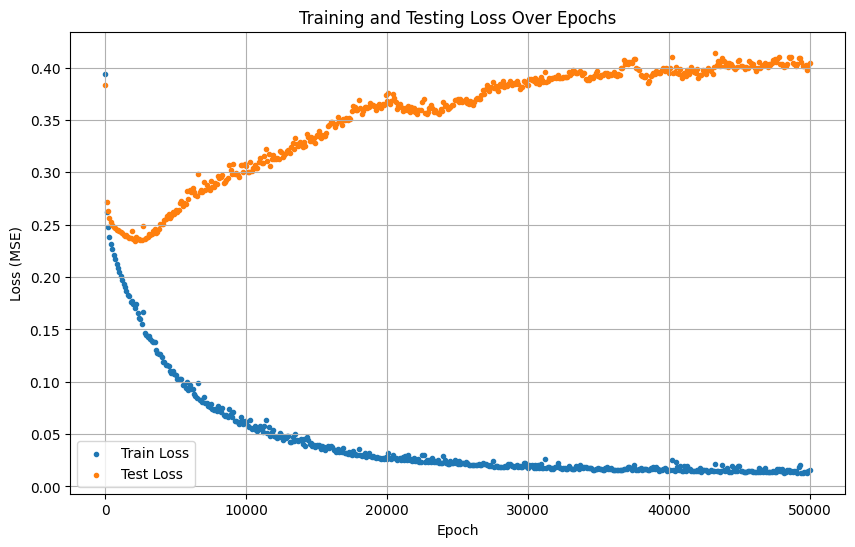

In [25]:
# plot train and test loss
epochs_train, losses_train = zip(*train_loss_log)
epochs_test, losses_test = zip(*test_loss_log)

plt.figure(figsize=(10, 6))
# plt.plot(epochs_train, losses_train, label='Train Loss', marker='.')
# plt.plot(epochs_test, losses_test, label='Test Loss', marker='.')
plt.scatter(epochs_train, losses_train, label='Train Loss', marker='.')
plt.scatter(epochs_test, losses_test, label='Test Loss', marker='.')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Testing Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

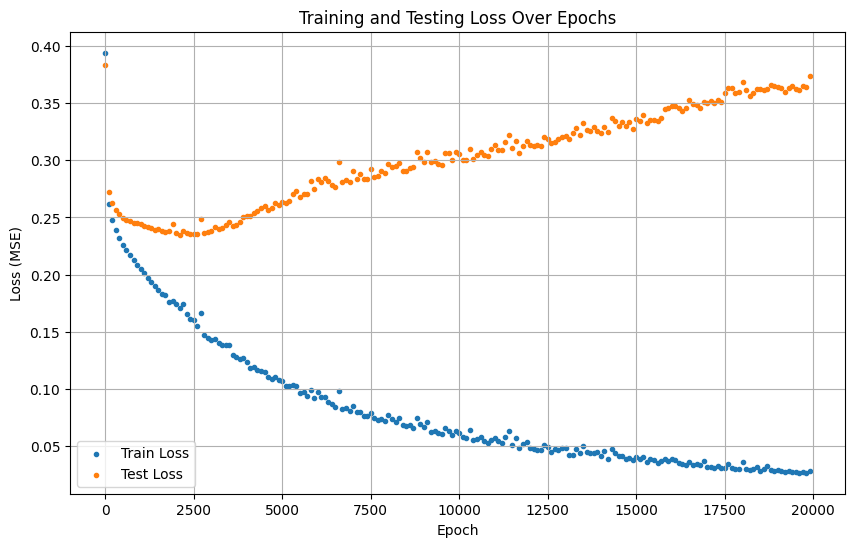

In [44]:
epoch_end = 20000 
end = int(epoch_end / checkpoint)

plt.figure(figsize=(10, 6))
plt.scatter(epochs_train[0:end], losses_train[0:end], label='Train Loss', marker='.')
plt.scatter(epochs_test[0:end], losses_test[0:end], label='Test Loss', marker='.')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Testing Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()